In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json
from collections import defaultdict as dd
import csv
import re
import seaborn as sns


In [7]:
df_ts = pd.read_excel('time_series.xlsx',sheet_name="Sheet1", engine="openpyxl")
df_ts.rename(columns = {'Unnamed: 0': 'type'},inplace=True)
df_ts.set_index('type',inplace=True)
df_ts


,2001,2004–05,2007–08,2011–12,2014–15,2017–18
type,,,,,,
Arthritis(c),13.6,15.3,15.2,14.8,15.3,15.0
Asthma,11.6,10.2,9.9,10.2,10.8,11.2
Back problems (dorsopathies)(d),21.0,16.7,14.9,13.6,16.2,16.4
Cancer (malignant neoplasms),1.4,1.7,1.6,1.5,1.6,1.8
Chronic obstructive pulmonary disease (COPD)(e),3.5,3,2.4,2.4,2.6,2.5
Diabetes mellitus(f),3.3,na,4.4,4.5,5.1,4.9
Hayfever and allergic rhinitis,15.5,16.1,15.1,16.7,19.4,19.3
"Heart, stroke and vascular disease(g)",4.1,3.8,5.3,4.7,5.2,4.8
Hypertension(h),10.1,10.7,9.4,10.2,11.3,10.6


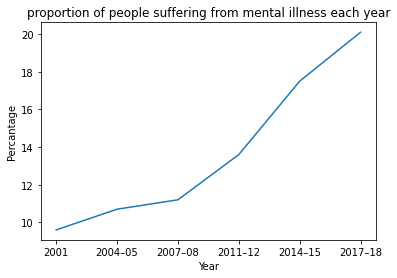

In [8]:
#plot proportion of people suffering from mental illness over time
plt.plot(np.arange(len(df_ts.columns)),df_ts.loc['Mental and behavioural conditions(j)(k)',:])
plt.xticks(np.arange(len(df_ts.columns)),df_ts.columns)
plt.title('proportion of people suffering from mental illness each year')
plt.xlabel('Year')
plt.ylabel('Percantage')
plt.savefig('proportion of people with mental illness each year.png')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


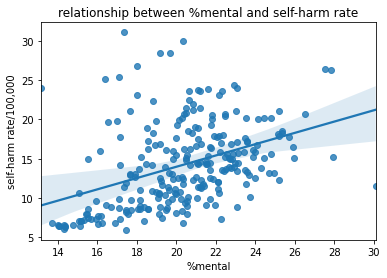

In [9]:
df_fe = pd.read_excel('features_data.xlsx',sheet_name="Sheet1", engine="openpyxl")
#delete record with missing value
df_fe.replace(to_replace='..', value=np.nan, inplace=True)
df_fe.dropna(inplace=True)
df_fe.drop('Name\n(PHN/LGA)',axis=1,inplace=True)
df_fe.set_index('Code\n(PHN/LGA)',inplace=True)
#itendify the relationship between self_harm rate and mental health by removing outliers
max_val = max(df_fe['self-harm rate/100,000'].apply(lambda x: float(x)))
df_777 = df_fe.loc[df_fe['self-harm rate/100,000'].apply(lambda x: float(x))>0]
df_777 = df_777.loc[df_777['self-harm rate/100,000'].apply(lambda x: float(x))!=max_val]
sns.regplot('%mental','self-harm rate/100,000',data=df_777, ci=100)
plt.title('relationship between %mental and self-harm rate')
plt.savefig('mental&harm.png')

In [10]:
corr_matrix = df_fe.corr()
corr_matrix.to_csv('feasure selection corr matrix.csv')

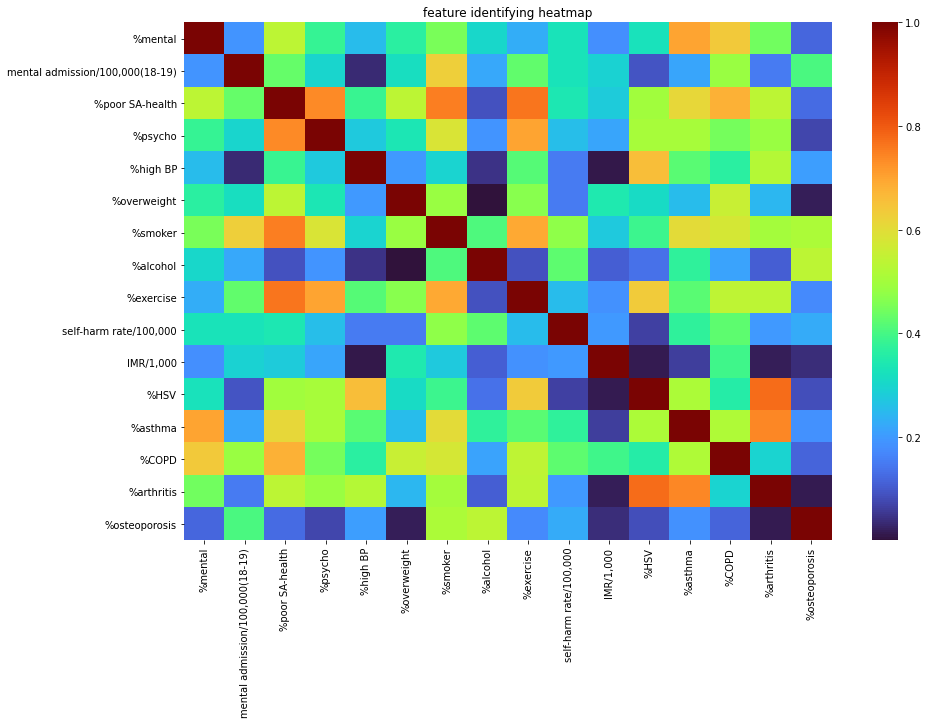

<Figure size 1008x720 with 0 Axes>

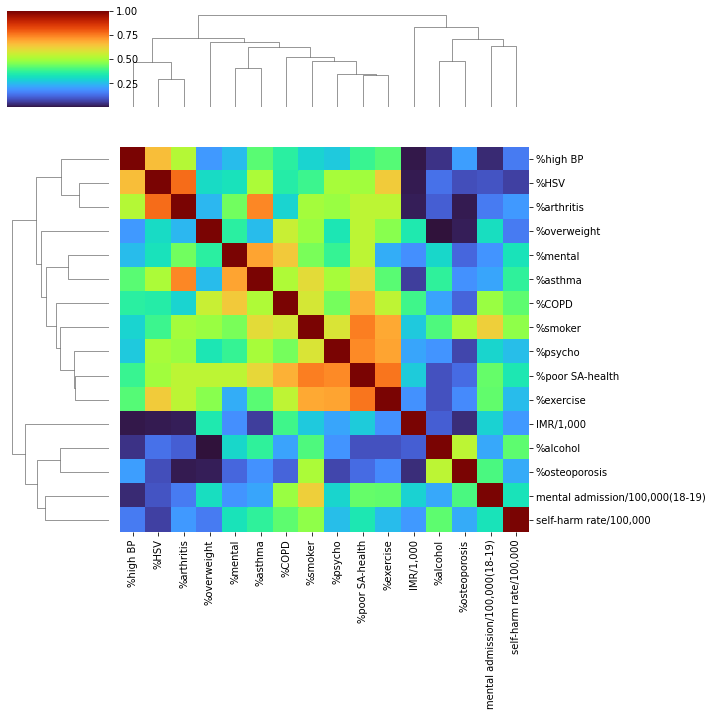

In [11]:
import seaborn as sns
#show absolute value of correlation to identify potential variables
abs_corr_matrix=corr_matrix.apply(lambda x: abs(x))
plt.figure(1,figsize=(14,10))
sns.heatmap(abs_corr_matrix,cmap='turbo',xticklabels=True)
plt.tight_layout()
plt.title('feature identifying heatmap')
plt.savefig('feature identifying heatmap.png')
plt.show()

plt.figure(2,figsize=(14,10))
sns.clustermap(abs_corr_matrix,cmap='turbo',xticklabels=True)
plt.tight_layout()
plt.savefig('feature identifying heatmap(clusters).png')
plt.show()


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-package

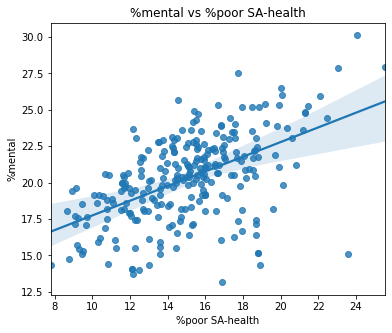

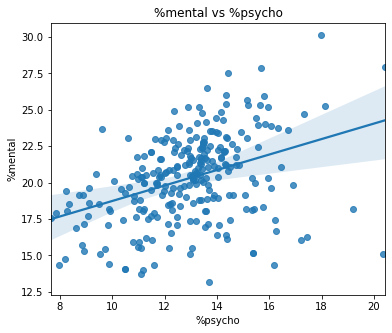

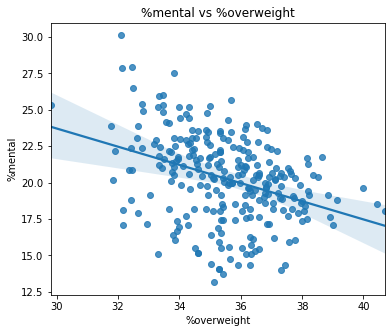

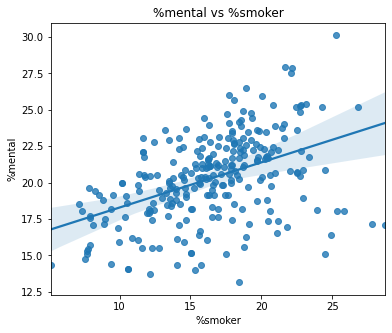

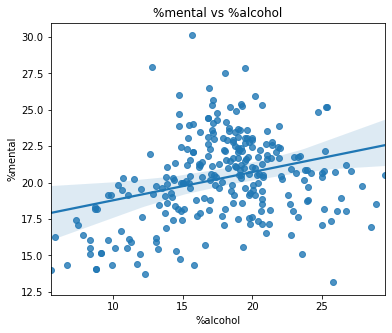

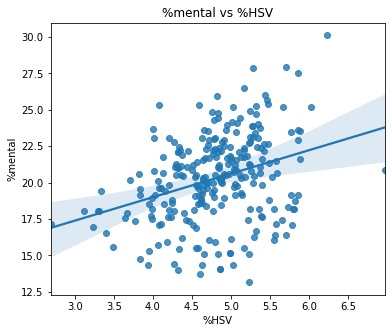

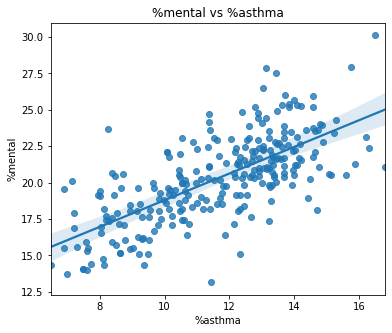

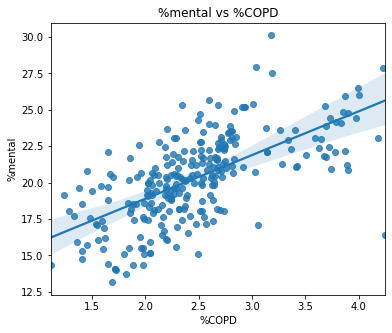

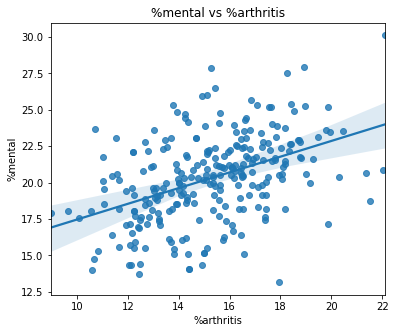

In [14]:
#identify correlated features
dependent_v = df_fe['%mental']
feature_lst = ['%poor SA-health','%psycho','%overweight','%smoker','%alcohol','%HSV','%asthma','%COPD','%arthritis']
#visualise features to identify what kinds of relationship exists
i = 1

for f in feature_lst:
    plt.figure(i,figsize=(6,5))
    sns.regplot(f,'%mental',data=df_fe, ci=100)
    plt.title(f'%mental vs {f}')
    i += 1
    plt.savefig(f'%mental vs {f}.png')
    


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


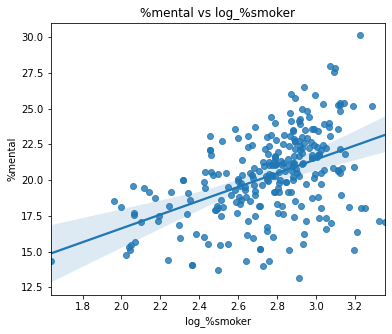

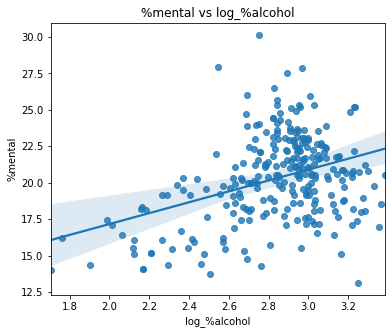

In [15]:
# for alcohol and smoking we seems to have a non-linear relationship
# modify smoking and alcohol variable by taking the log of smoker and a engineered new variable for alcohol
df_fe['log_%smoker'] = np.log(df_fe['%smoker'])
df_fe['log_%alcohol'] = np.log(df_fe['%alcohol'])
feature_lst_modified = ['log_%smoker','log_%alcohol']
j = 1
for f in feature_lst_modified:
    plt.figure(j,figsize=(6,5))
    sns.regplot(f,'%mental',data=df_fe, ci=100)
    plt.title(f'%mental vs {f}')
    plt.savefig(f'%mental vs {f}.png')
    j += 1

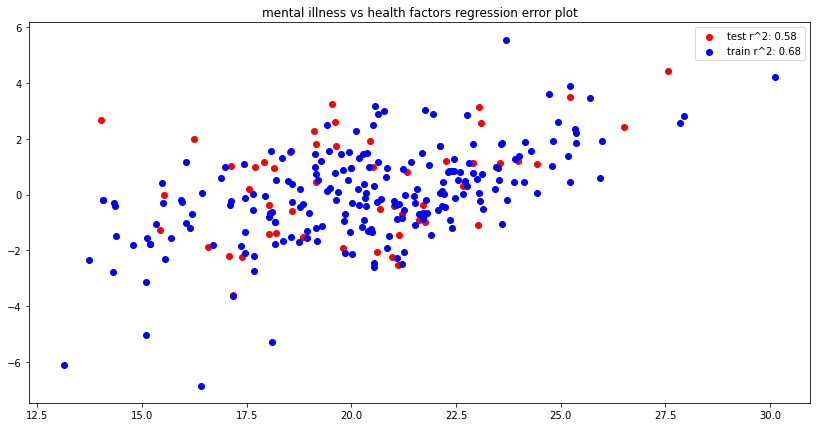

In [38]:
#fit a lm model
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
df_fe['%alcohol_squared'] = df_fe['%alcohol']**2
feature_lst_md = ['%poor SA-health','%psycho','%overweight','log_%smoker','%alcohol','%alcohol_squared','%HSV','%asthma','%COPD','%arthritis']
X = df_fe[feature_lst_md]
y = dependent_v
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_train_predictions = lm.predict(X_train)
y_test_predictions = lm.predict(X_test)
error_test = y_test - y_test_predictions
error_train = y_train - y_train_predictions
test_r = lm.score(X_test,y_test)
train_r = lm.score(X_train,y_train)
plt.figure(figsize=(14,7))
plt.scatter(y_test,error_test,color='red',label=f'test r^2: {round(test_r,2)}')
plt.scatter(y_train,error_train,color='blue',label=f'train r^2: {round(train_r,2)}')
plt.title('mental illness vs health factors regression error plot')
plt.legend()
plt.savefig(f'health regression model.png')

In [51]:
#get a summary of statistic
from statsmodels.api import OLS
import statsmodels.api as sm
#from statsmodels.regression import linear_model
X = sm.add_constant(X)
result = OLS(y,X).fit(cov_type='HC0',het_scale='HC0')
print(result.summary())

#verify we used the correct model by using the untransform data sets
feature_lst_md = ['%poor SA-health','%psycho','%overweight','%smoker','%alcohol','%HSV','%asthma','%COPD','%arthritis']
X = df_fe[feature_lst_md]
y = dependent_v
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_train_predictions = lm.predict(X_train)
y_test_predictions = lm.predict(X_test)
error_test = y_test - y_test_predictions
error_train = y_train - y_train_predictions
test_r = lm.score(X_test,y_test)
train_r = lm.score(X_train,y_train)
p_model = sm.GLM(y_train, X_train,family=sm.families.Gaussian())
p_results = p_model.fit()
y_prd = p_results.predict(X_test)
print(r2_score(y_test,y_prd))
p_results.summary()

                            OLS Regression Results                            
Dep. Variable:                %mental   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     49.55
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           4.55e-51
Time:                        12:46:07   Log-Likelihood:                -535.21
No. Observations:                 265   AIC:                             1090.
Df Residuals:                     255   BIC:                             1126.
Df Model:                           9                                         
Covariance Type:                  HC0                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              15.6815      3.757     

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                %mental   No. Observations:                  212
Model:                            GLM   Df Residuals:                      203
Model Family:                Gaussian   Df Model:                            8
Link Function:               identity   Scale:                          3.5601
Method:                          IRLS   Log-Likelihood:                -430.81
Date:                Tue, 12 Oct 2021   Deviance:                       722.70
Time:                        12:46:07   Pearson chi2:                     723.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7896
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
%poor SA-health     0.0626      0.088      0.709      0.478      -0.111       0.236
%psycho             0.1613      0.111      1.456      0.145      -0.056       0.378
%overweight         0.1379      0.038      3.608      0.000       0.063       0.213
%smoker            -0.1318      0.065     -2.019      0.043      -0.260      -0.004
%alcohol            0.0910      0.046      1.985      0.047       0.001       0.181
%HSV               -0.2726      0.378     -0.721      0.471      -1.013       0.468
%asthma             0.6360      0.108      5.889      0.000       0.424       0.848
%COPD               2.1101      0.312      6.772      0.000       1.499       2.721
%arthritis          0.1030      0.119      0.867      0.386      -0.130       0.336
===================================================================================
"""